In [1]:
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import numpy as np
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

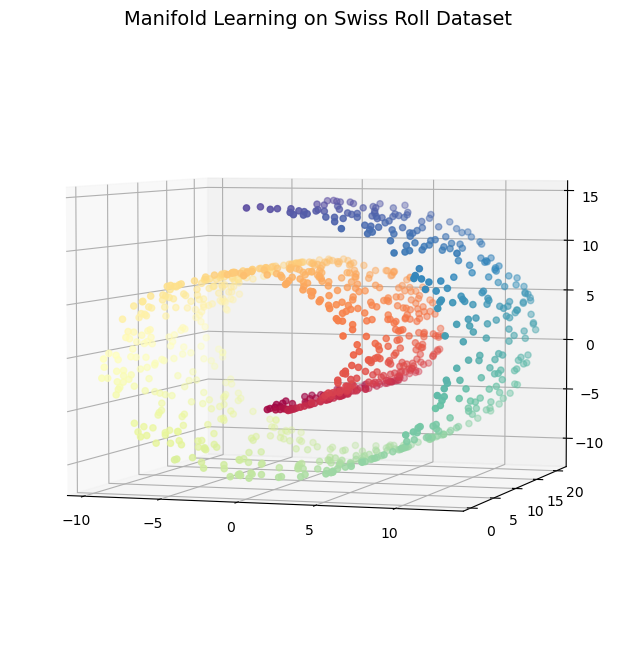

In [2]:
#We load the swiss roll dataset
X, color = datasets.make_swiss_roll(1000, random_state=0) 
n_neighbors = 10
n_components = 2 #projecting into 2-d
# Creating the plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Manifold Learning on Swiss Roll Dataset", fontsize=14)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

In [3]:
model_PCA = PCA(n_components=2)
t0 = time()
Y = model_PCA.fit_transform(X)
t1 = time()

PCA: 0.0036 sec


Text(0.5, 1.0, 'PCA (0.0036 sec)')

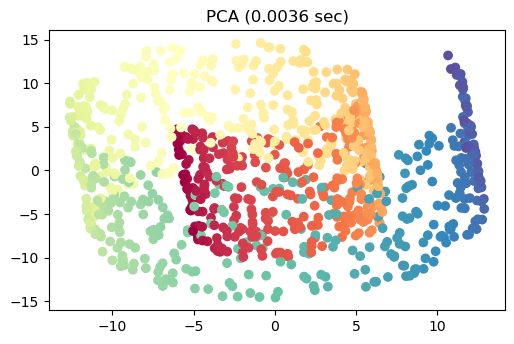

In [4]:
print("PCA: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(232)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("PCA (%.2g sec)" % (t1 - t0))

In [5]:
model_MDS = MDS(n_components=2)
t0 = time()
Y = model_MDS.fit_transform(X)
t1 = time()

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS: 9.9 sec


Text(0.5, 1.0, 'MDS (9.9 sec)')

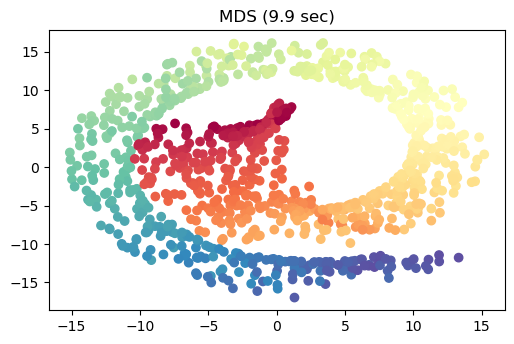

In [6]:
print("MDS: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(232)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("MDS (%.2g sec)" % (t1 - t0))

In [7]:
model_LLE = LLE(n_components=2, n_neighbors=10)
t0 = time()
Y = model_LLE.fit_transform(X)
t1 = time()


LLE: 0.038 sec


Text(0.5, 1.0, 'LLE (0.038 sec)')

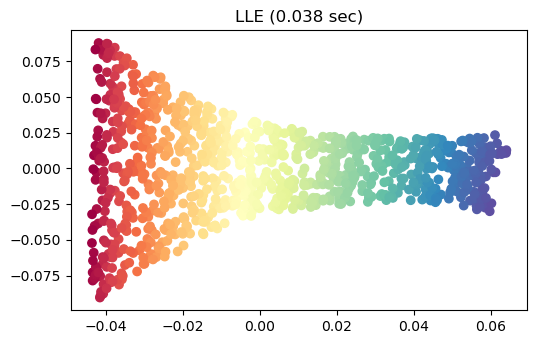

In [8]:
print("LLE: %.2g sec" % (t1 - t0))
fig2 = plt.figure(figsize=(20, 8))
ax2 = fig2.add_subplot(232)
ax2.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.set_title("LLE (%.2g sec)" % (t1 - t0))

In [9]:
model_TSNE = TSNE(n_components=2)
t0 = time()
Y = model_TSNE.fit_transform(X)
t1 = time()


TSNE: 1.7 sec


Text(0.5, 1.0, 'TSNE (1.7 sec)')

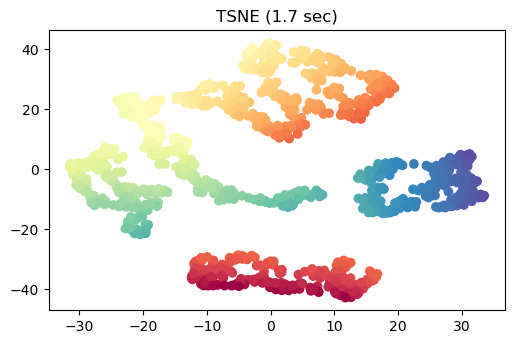

In [10]:
print("TSNE: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(232)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("TSNE (%.2g sec)" % (t1 - t0))

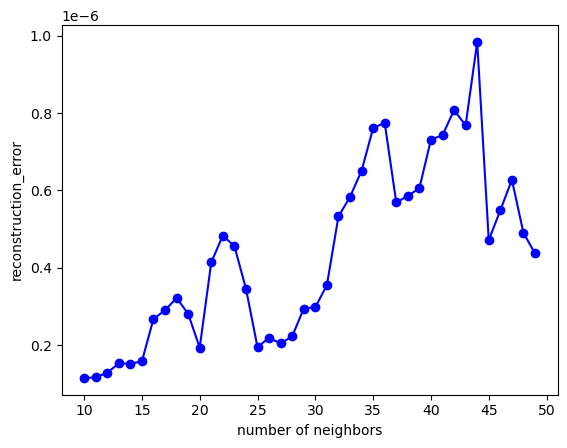

In [11]:
score_LLE = []
for k in range(10,50):
    LLE =manifold.LocallyLinearEmbedding(n_neighbors=k, n_components=n_components, eigen_solver='auto')
    Y = LLE.fit_transform(X)
    score_LLE.append(LLE.reconstruction_error_)

plt.plot(range(10,50), score_LLE, 'bo-')
plt.xlabel('number of neighbors')
plt.ylabel('reconstruction_error')
plt.show()

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in

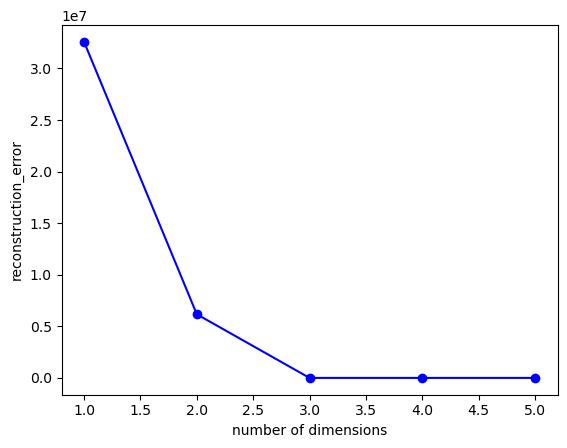

In [12]:
score_mds = []
for k in range(1,6):
    mds = MDS(n_components=k, random_state=1)
    Y = mds.fit_transform(X)
    score_mds.append(mds.stress_)

plt.plot(range(1,6), score_mds, 'bo-')
plt.xlabel('number of dimensions')
plt.ylabel('reconstruction_error')
plt.show()

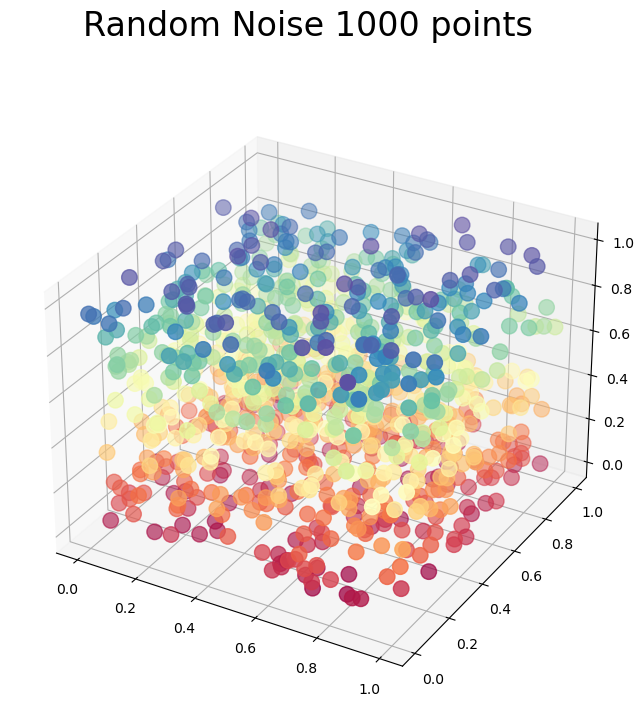

In [13]:
# Generate a random point cloud, take z component for coloring
X2 = np.random.rand(1000, 3)
color2 = X2[:,2]

fig = plt.figure(figsize=(8,8))
plt.suptitle("Random Noise %i points"
             % (1000), fontsize=24)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=color2, cmap=plt.cm.Spectral,s=125)

In [14]:
t0 = time()
tsne = TSNE(n_components=2, random_state=1)
Y = tsne.fit_transform(X2)
t1 = time()

(-40.824950218200684,
 34.62370586395264,
 -34.806037998199464,
 37.93707857131958)

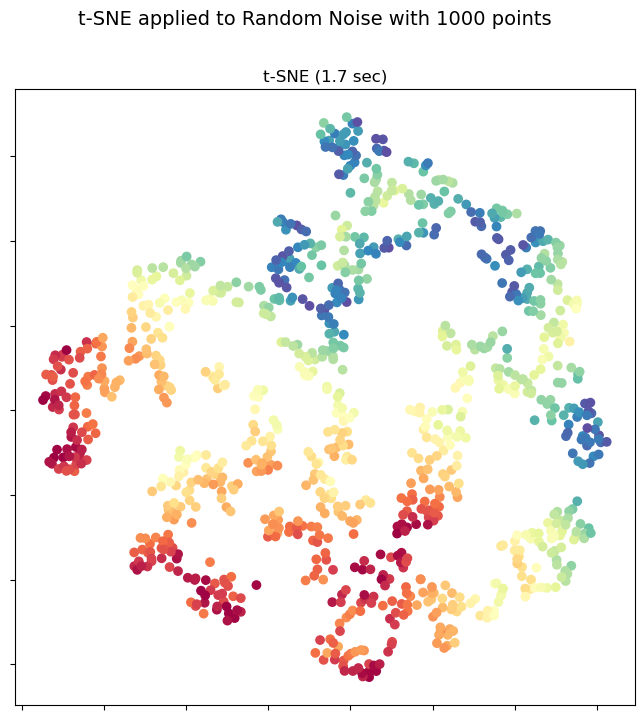

In [15]:
# Plot result
fig = plt.figure(figsize=(8,8))
plt.suptitle("t-SNE applied to Random Noise with %i points"
             % (1000), fontsize=14)

ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color2, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
